# no 1 import data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data into DataFrame
data = pd.read_csv('/content/drive/MyDrive/DATA AVD/Heart Disease Details/Heart_disease_details.csv')

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 49 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Name                                             334 non-null    object
 1   Gender                                           334 non-null    object
 2   Age                                              334 non-null    int64 
 3   Chest pain                                       334 non-null    int64 
 4   Shortness of breath                              334 non-null    int64 
 5   Fatigue                                          334 non-null    int64 
 6   Systolic                                         334 non-null    int64 
 7   Diastolic                                        334 non-null    int64 
 8   Heart rate (bpm)                                 334 non-null    int64 
 9   Lung sounds                                

disini saya menggunakan seleksi fitur beberpa kali untuk mendapatkan sebuah akurasi dan visualisasi yang jelas

In [ ]:
# Drop kolom pertama karena tidak berguna (hanya index)
data.drop("Treatment", axis=1, inplace=True)
data.dtypes


Name                                               object
Gender                                             object
Age                                                 int64
Chest pain                                          int64
Shortness of breath                                 int64
Fatigue                                             int64
Systolic                                            int64
Diastolic                                           int64
Heart rate (bpm)                                    int64
Lung sounds                                         int64
Cholesterol level (mg/dL)                           int64
LDL level (mg/dL)                                   int64
HDL level (mg/dL)                                   int64
Diabetes                                            int64
Atrial fibrillation                                 int64
Mitral valve prolapse                               int64
Rheumatic fever                                     int64
Mitral stenosi

Setelah melakukan seleksi fitur saya save terlebih dahulu filenya

In [ ]:
data.to_csv("data_hearts_disease_PreProcessed.csv", encoding='utf8')

setelah di save import saya mengimport kembali file yg sudah di seleksi

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DATA AVD/Heart Disease Details/data_hearts_disease_PreProcessed.csv')

sehingga yang dari banyaknya variabel menjadi 11 variabel

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           334 non-null    int64
 1   Gender               334 non-null    int64
 2   Age                  334 non-null    int64
 3   Chest pain           334 non-null    int64
 4   Shortness of breath  334 non-null    int64
 5   Fatigue              334 non-null    int64
 6   Heart rate (bpm)     334 non-null    int64
 7   Diabetes             334 non-null    int64
 8   Drug use             334 non-null    int64
 9   Alcoholism           334 non-null    int64
 10  Smoking              334 non-null    int64
 11  Obesity              334 non-null    int64
dtypes: int64(12)
memory usage: 31.4 KB


In [ ]:
data.head()

,Unnamed: 0,Gender,Age,Chest pain,Shortness of breath,Fatigue,Heart rate (bpm),Diabetes,Drug use,Alcoholism,Smoking,Obesity
0,0,1,55,1,1,1,100,0,0,0,1,0
1,1,2,57,1,1,1,110,0,0,0,1,0
2,2,1,60,1,1,1,95,0,0,0,1,0
3,3,2,62,1,1,1,100,0,0,0,1,0
4,4,1,58,1,1,1,105,0,0,0,1,0


In [ ]:
data.Gender.unique

<bound method Series.unique of 0      1
1      2
2      1
3      2
4      1
      ..
329    1
330    2
331    1
332    2
333    1
Name: Gender, Length: 334, dtype: int64>

In [ ]:
data['Gender'] = data['Gender'].replace({'Female':1 , 'Male':2})

In [ ]:
data.dtypes

Unnamed: 0             int64
Gender                 int64
Age                    int64
Chest pain             int64
Shortness of breath    int64
Fatigue                int64
Heart rate (bpm)       int64
Diabetes               int64
Drug use               int64
Alcoholism             int64
Smoking                int64
Obesity                int64
dtype: object

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X = data.iloc[:, :-1]  # Fitur
y = data.iloc[:, -1]   # Target

selector = SelectKBest(chi2, k=5)  # Menggunakan 5 fitur terbaik
data.info

<bound method DataFrame.info of      Unnamed: 0  Gender  Age  Chest pain  Shortness of breath  Fatigue  \
0             0       1   55           1                    1        1   
1             1       2   57           1                    1        1   
2             2       1   60           1                    1        1   
3             3       2   62           1                    1        1   
4             4       1   58           1                    1        1   
..          ...     ...  ...         ...                  ...      ...   
329         329       1   55           1                    1        1   
330         330       2   48           1                    1        1   
331         331       1   65           1                    1        1   
332         332       2   68           1                    1        1   
333         333       1   45           1                    0        1   

     Heart rate (bpm)  Diabetes  Drug use  Alcoholism  Smoking  Obesity  
0    

In [ ]:
data.describe(include='all')


,Unnamed: 0,Gender,Age,Chest pain,Shortness of breath,Fatigue,Heart rate (bpm),Diabetes,Drug use,Alcoholism,Smoking,Obesity
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,166.500000,1.502994,50.149701,0.880240,0.826347,0.979042,101.152695,0.002994,0.041916,0.002994,0.350299,0.056886
std,96.561725,0.500741,15.151935,0.325168,0.379379,0.143459,11.667466,0.054718,0.200698,0.054718,0.477779,0.231973
min,0.000000,1.000000,23.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.250000,1.000000,40.000000,1.000000,1.000000,1.000000,96.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,166.500000,2.000000,50.000000,1.000000,1.000000,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,249.750000,2.000000,61.500000,1.000000,1.000000,1.000000,110.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,333.000000,2.000000,100.000000,1.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Pengecekan missing value

is_null = data.isnull().sum().to_frame(name = "is_null").T
is_na = data.isna().sum().to_frame(name = "is_na").T
Unique = data.nunique().to_frame(name = "Unique").T
pd.concat([Unique , is_na , is_null])

,Unnamed: 0,Gender,Age,Chest pain,Shortness of breath,Fatigue,Heart rate (bpm),Diabetes,Drug use,Alcoholism,Smoking,Obesity
Unique,334,2,34,2,2,2,11,2,2,2,2,2
is_na,0,0,0,0,0,0,0,0,0,0,0,0
is_null,0,0,0,0,0,0,0,0,0,0,0,0


# No 2 Visualisasi data

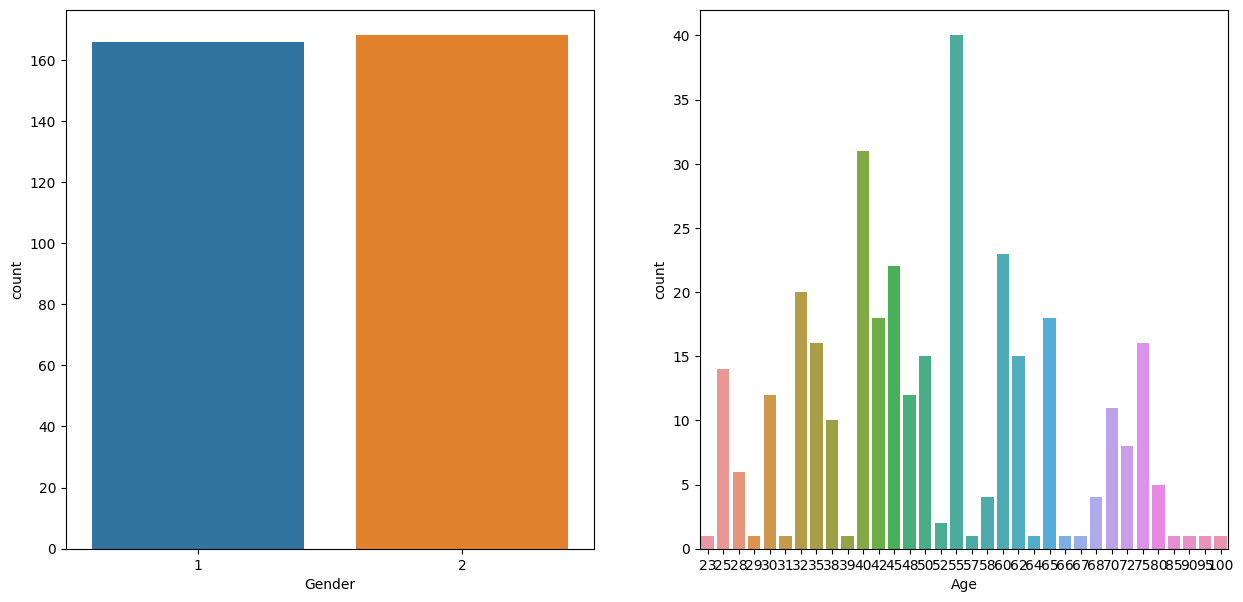

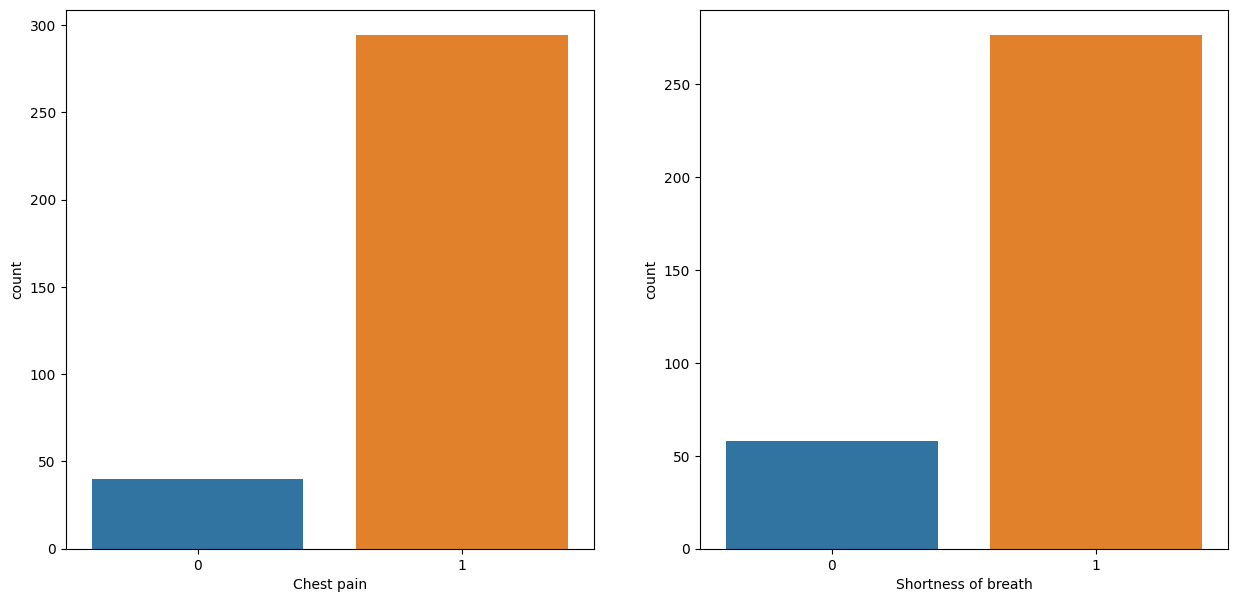

In [ ]:
# countplot for categorical columns

categorical = ['Gender' , 'Age' , 'Chest pain' , 'Shortness of breath', 'Heart rate (bpm)']

i = 0
while i < 4 :

    fig = plt.figure(figsize = (15 , 7))

    plt.subplot(1,2,1)
    sns.countplot(x=categorical[i] , data = data)
    i += 1

    plt.subplot(1,2,2)
    sns.countplot(x=categorical[i] , data = data)
    i += 1

    plt.show()

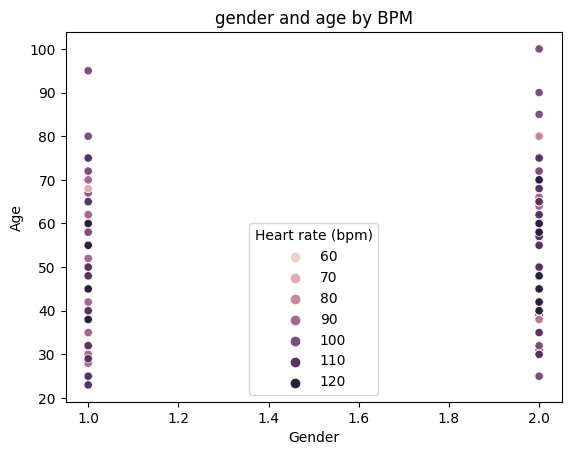

In [ ]:
# Create a scatterplot of height and weight by gender
sns.scatterplot(data=data, x="Gender", y="Age", hue="Heart rate (bpm)")
plt.title("gender and age by BPM")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

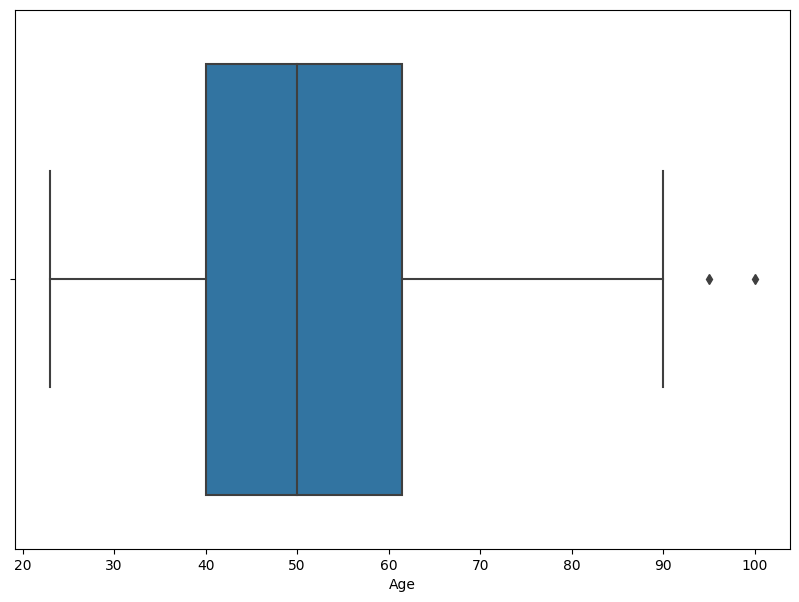

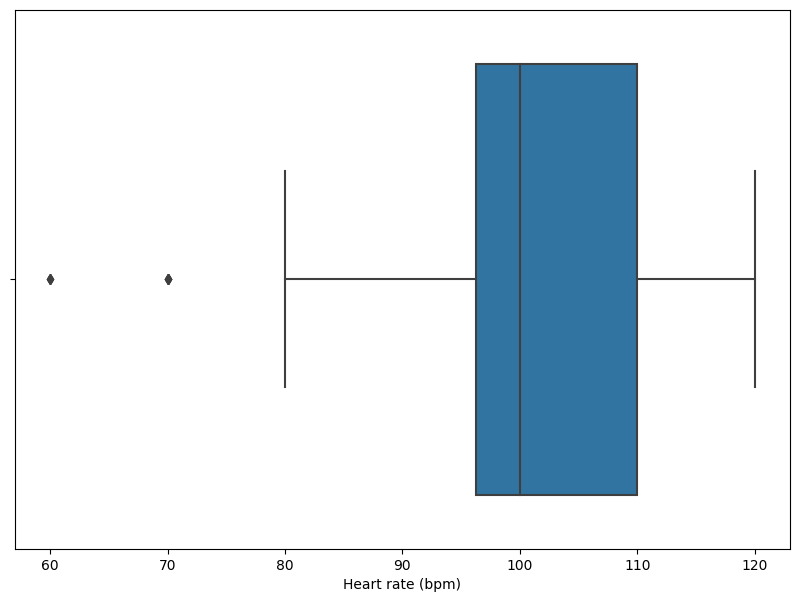

In [ ]:
# boxplot for continuous columns

continuous = ['Age' , 'Heart rate (bpm)']

i = 0
while i < 2 :

    fig = plt.figure (figsize = (10 , 7))

    sns.boxplot(x = continuous[i] , data = data)
    i += 1

    plt.show()

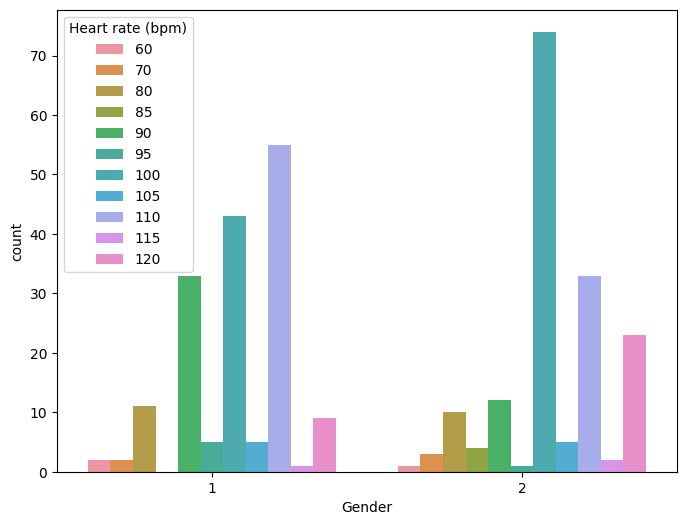

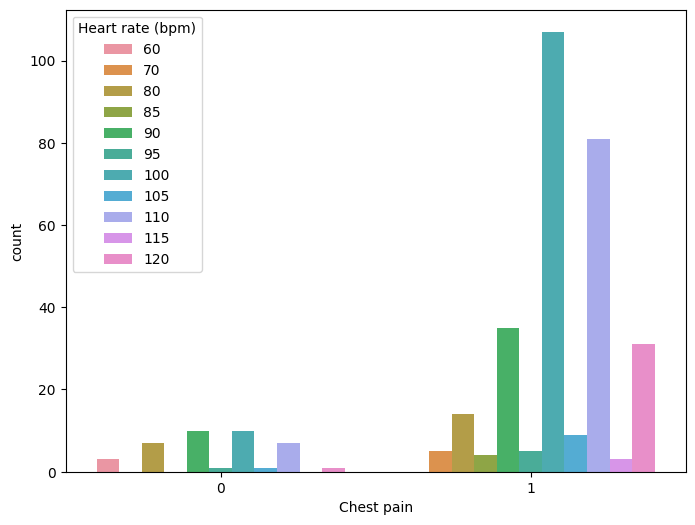

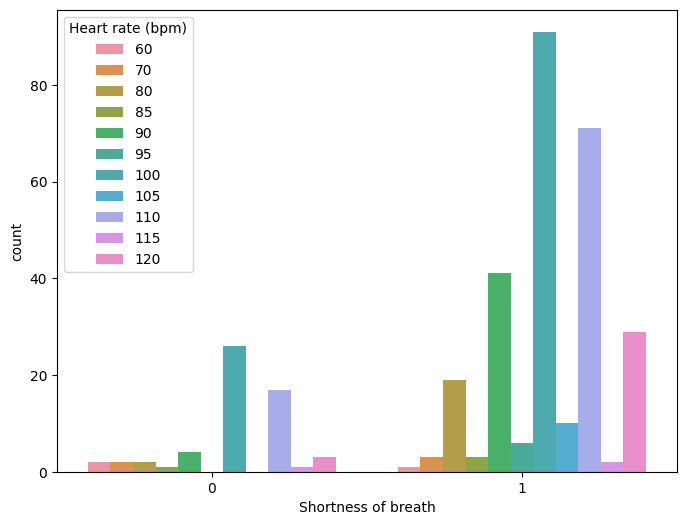

In [ ]:
categorical = ['Gender' , 'Chest pain' , 'Shortness of breath' ]

i = 0
while i < 3 :

    plt.figure(figsize=(8,6))
    sns.countplot(x = categorical[i], data=data, hue = 'Heart rate (bpm)')
    i+=1
    plt.show()

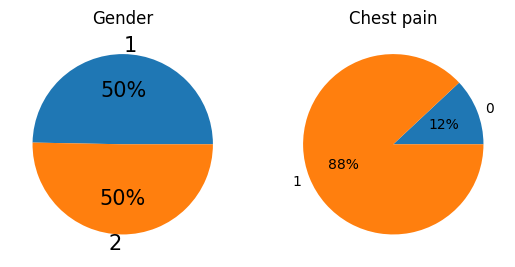

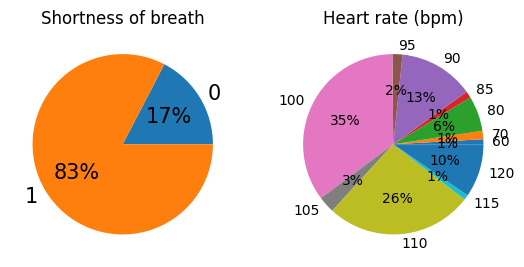

In [ ]:
categorical = ['Gender' , 'Chest pain' , 'Shortness of breath' , 'Heart rate (bpm)']

i = 0
while i < 4 :

    plt.subplot(1,2,1)
    data.groupby(categorical[i]).size().plot(kind='pie',  textprops={'fontsize': 15},autopct='%1.0f%%')
    plt.title(categorical[i])
    i+=1

    plt.subplot(1,2,2)
    data.groupby(categorical[i]).size().plot(kind='pie',  textprops={'fontsize': 10},autopct='%1.0f%%')
    plt.title(categorical[i])
    i+=1

    plt.show()

In [ ]:
corr_matrix = data.corr()

<Axes: >

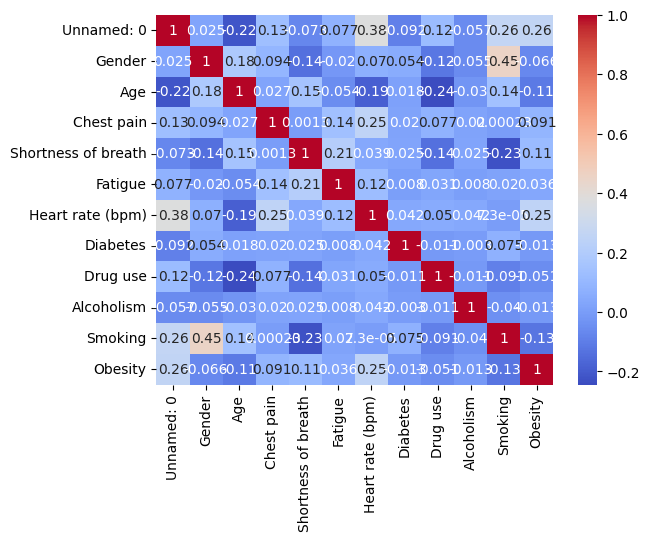

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


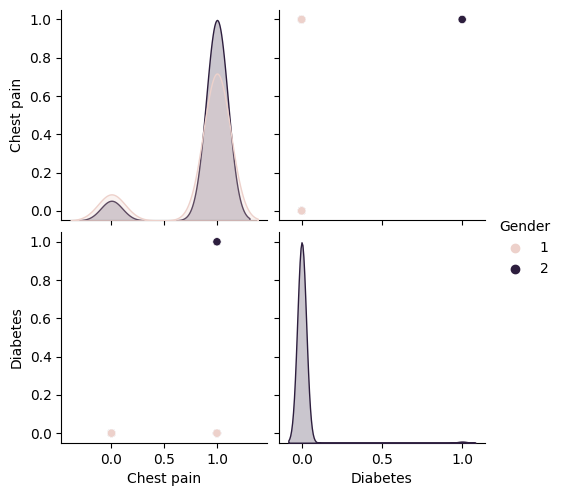

In [ ]:
p = sns.pairplot(data[['Gender','Chest pain','Diabetes']], hue="Gender")


setelah memvisualisasikan sebuah data yang sudah di pilah dan di pilih itu, saya lanjut ke pengukuran akurasi secara terpisah

#import library buat kebutuhan algoritma dan visualisasi roc

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Algoritma Decision Tree

In [ ]:
# Mengimpor dataset
data = pd.read_csv('/content/drive/MyDrive/DATA AVD/Heart Disease Details/data_hearts_disease_PreProcessed.csv')

In [ ]:
# memisahkan antara fitur dan target
X = data.iloc[:, :-1]  # Fitur
y = data.iloc[:, -1]   # Target

In [ ]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# membuat model algoritmanya
decision_tree = DecisionTreeClassifier()

In [ ]:
# Melatih dan melakukan prediksi dengan Decision Tree
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)

In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Akurasi Decision Tree:", accuracy_dt)


Akurasi Decision Tree: 0.9701492537313433


In [ ]:
#mengukkur akurasi dari roc
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print("ROC-AUC Decision Tree:", roc_auc_dt)

ROC-AUC Decision Tree: 0.9846153846153847


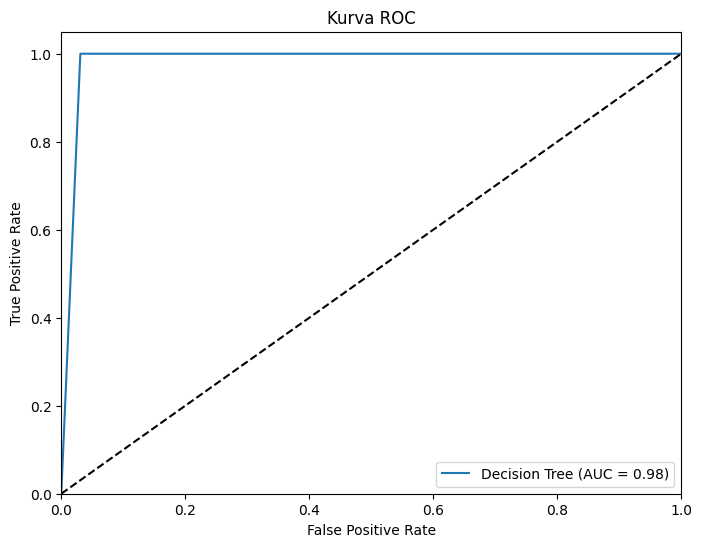

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.legend(loc="lower right")
plt.show()

# algoritma random forest

In [ ]:
# Mengimpor dataset
data = pd.read_csv('/content/drive/MyDrive/DATA AVD/Heart Disease Details/data_hearts_disease_PreProcessed.csv')

In [ ]:
# Memisahkan fitur dan target
X = data.iloc[:, :-1]  # Fitur
y = data.iloc[:, -1]   # Target

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#membuat model algoritma
random_forest = RandomForestClassifier()

In [ ]:
# Melatih dan melakukan prediksi dengan Random Forest
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)

In [ ]:
#menampilkan akurasi dari data yang sudah di latih
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Akurasi Random Forest:", accuracy_rf)

Akurasi Random Forest: 0.9850746268656716


In [ ]:
#mengecek akurasi roc
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("ROC-AUC Random Forest:", roc_auc_rf)

ROC-AUC Random Forest: 0.9923076923076923


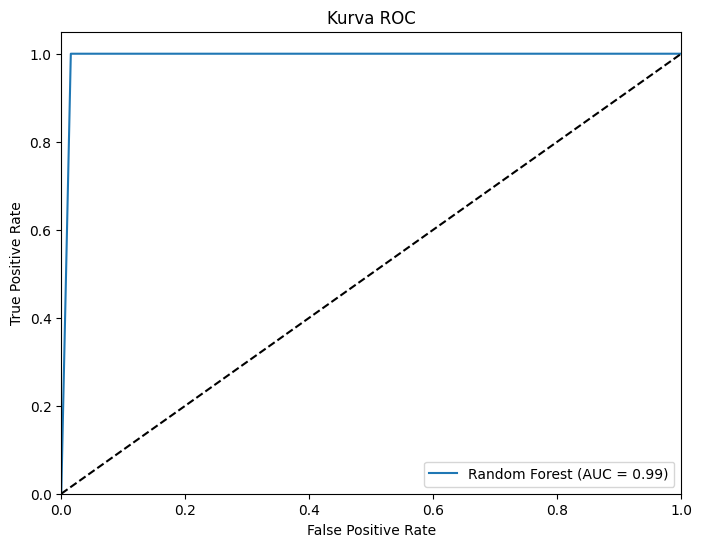

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.legend(loc="lower right")
plt.show()

#algoritma logistik regresi

In [ ]:
# Mengimpor dataset
data = pd.read_csv('/content/drive/MyDrive/DATA AVD/Heart Disease Details/data_hearts_disease_PreProcessed.csv')

In [ ]:
# Memisahkan fitur dan target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#membuat model algortima
vlogistic_regression = LogisticRegression()

In [ ]:
# mencoba dan melakukan prediksi dengan algoritma Logistik Regressi
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# menampilkan akurasi
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Akurasi Logistic Regression:", accuracy_lr)

Akurasi Logistic Regression: 0.9701492537313433


In [ ]:
#mengukur akurasi roc
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print("ROC-AUC Logistic Regression:", roc_auc_lr)

ROC-AUC Logistic Regression: 0.5


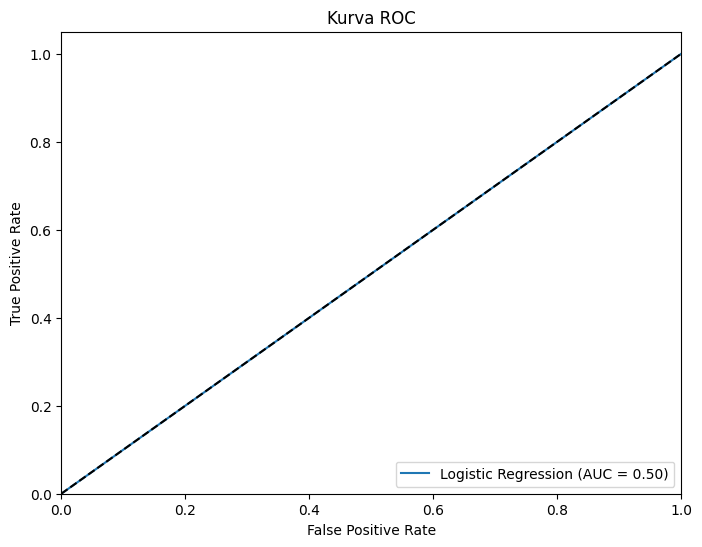

In [ ]:
# Menampilkan kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.legend(loc="lower right")
plt.show()

#visualisasi roc jika di gabung

In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Akurasi Decision Tree:", accuracy_dt)
print("Akurasi Random Forest:", accuracy_rf)
print("Akurasi Logistic Regression:", accuracy_lr)

Akurasi Decision Tree: 0.9701492537313433
Akurasi Random Forest: 0.9850746268656716
Akurasi Logistic Regression: 0.9701492537313433


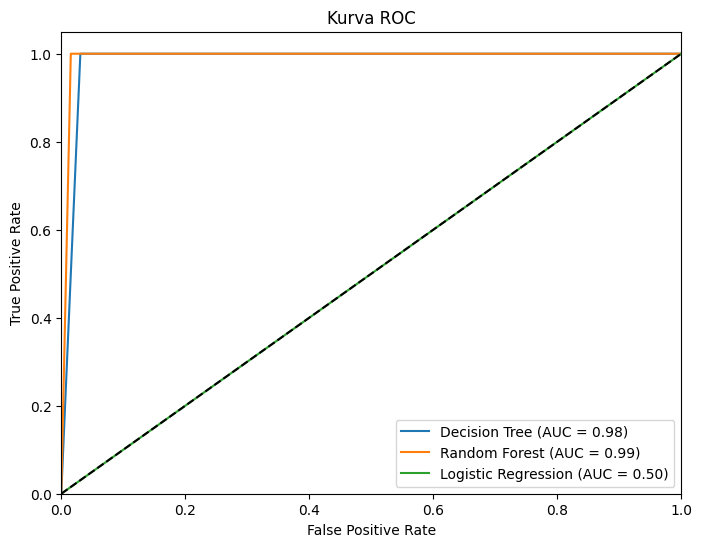

In [ ]:
 plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.legend(loc="lower right")
plt.show()